<a href="https://colab.research.google.com/github/waithera-shop/Data_Engineering/blob/master/Salaryproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#prerequisuites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read data with the path to the CSV file to read a comma-separated values file.

[**Link to salary dataset**](https://raw.githubusercontent.com/waithera-shop/salary_data/main/Salary_Data.csv)

In [3]:
# Reading data from CSV

file_path = "https://raw.githubusercontent.com/waithera-shop/salary_data/main/Salary_Data.csv"
Salary_data= pd.read_csv(file_path)
Salary_data



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
#Get salary info, types
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
Salary_data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
#check for null values
Salary_data.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [7]:
#drop null values and confirm
Salary_data.dropna(inplace=True)
Salary_data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


## Adding a new column for Experience Range By categorization

In [8]:
#Check max and minimum Years of Experience
Salary_data['Years of Experience'].max()
Salary_data['Years of Experience'].min()
print(Salary_data['Years of Experience'].max())
print(Salary_data['Years of Experience'].min())

34.0
0.0


In [9]:
def categorize(value):
    if value <= 5:
        return '0-5'
    elif value <= 11:
        return '6-11'
    elif value <= 16:
        return '12-16'
    elif value <= 21:
        return '17-21'
    elif value <= 26:
        return '22-26'
    else:
        return '27-34'

Salary_data['Range_Experience'] = Salary_data['Years of Experience'].apply(categorize)

Salary_data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience
56,27.0,Female,Master's,UX Researcher,2.0,65000.0,0-5
783,33.0,Female,Master's,Product Manager,11.0,198000.0,6-11
4323,44.0,Female,Master's Degree,Human Resources Manager,15.0,152000.0,12-16
383,33.0,Male,PhD,Data Scientist,8.0,190000.0,6-11
5554,39.0,Female,Bachelor's Degree,Financial Manager,16.0,200000.0,12-16
5004,29.0,Male,Bachelor's Degree,Senior Product Marketing Manager,6.0,100000.0,6-11
2633,46.0,Male,Bachelor's Degree,Senior Software Engineer,22.0,174324.0,22-26
5747,31.0,Female,PhD,Data Scientist,8.0,140000.0,6-11
5320,26.0,Male,Bachelor's Degree,Junior Software Engineer,1.0,55000.0,0-5
4831,33.0,Female,Master's Degree,Senior Software Engineer,8.0,105000.0,6-11


##Adding a Age Range Column to the dataset

In [10]:
# Check maximun and minimum Ages
Salary_data['Age'].max()
Salary_data['Age'].min()
print(Salary_data['Age'].max())
print(Salary_data['Age'].min())


62.0
21.0


In [11]:
def categorize(value):
    if value <= 28:
        return '23-28'
    elif value <= 34:
        return '29-34'
    elif value <= 40:
        return '35-40'
    elif value <= 46:
        return '41-46'
    elif value <= 52:
        return '47-52'
    elif value <= 58:
        return '53-58'
    else:
        return '59-62'

Salary_data['Age_Range'] = Salary_data['Age'].apply(categorize)

Salary_data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
2296,24.0,Female,Bachelor's Degree,Software Developer,2.0,55000.0,0-5,23-28
1812,46.0,Male,PhD,Senior Project Engineer,15.0,180000.0,12-16,41-46
1393,49.0,Male,PhD,Software Engineer Manager,15.0,185000.0,12-16,47-52
4432,45.0,Male,Master's Degree,Marketing Manager,20.0,204000.0,17-21,41-46
1112,30.0,Male,Bachelor's,Product Manager,8.0,185000.0,6-11,29-34
4257,50.0,Male,PhD,Data Scientist,23.0,225000.0,22-26,47-52
28,43.0,Female,PhD,Senior Consultant,15.0,140000.0,12-16,41-46
2371,27.0,Female,Bachelor's Degree,Software Engineer,3.0,70000.0,0-5,23-28
1076,33.0,Female,Master's,Product Manager,11.0,195000.0,6-11,29-34
4590,33.0,Male,Master's Degree,Web Developer,6.0,80000.0,6-11,29-34


In [12]:
# Replace other in Gender with Prefer Not To say
Salary_data['Gender'] = Salary_data['Gender'].replace('Other', 'Prefer Not To Say')
Salary_data.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
3288,25.0,Female,Master's Degree,Software Engineer,2.0,60000.0,0-5,23-28
2465,25.0,Prefer Not To Say,High School,Full Stack Engineer,2.0,69032.0,0-5,23-28
4273,26.0,Male,High School,Junior Sales Associate,1.0,26000.0,0-5,23-28
5515,29.0,Male,Bachelor's Degree,Marketing Analyst,4.0,70000.0,0-5,29-34
314,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0,6-11,35-40
2856,23.0,Male,PhD,Software Engineer Manager,0.0,52779.0,0-5,23-28
6587,40.0,Female,Bachelor's Degree,Financial Manager,11.0,110000.0,6-11,35-40
3783,27.0,Male,Bachelor's Degree,Software Developer,3.0,60000.0,0-5,23-28
4291,51.0,Male,PhD,Data Scientist,24.0,240000.0,22-26,47-52
2844,33.0,Female,Master's Degree,Full Stack Engineer,9.0,136986.0,6-11,29-34


In [13]:
# Replace bachelor's  with bahelor's Degree
Salary_data['Education Level'] = Salary_data['Education Level'].replace('Bachelor\'s', "Bachelor's Degree")
Salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0-5,29-34
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0-5,23-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12-16,41-46
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,6-11,35-40
4,52.0,Male,Master's,Director,20.0,200000.0,17-21,47-52
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,17-21,47-52
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0-5,29-34
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0-5,29-34
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,12-16,41-46


In [14]:
# Replace bachelor's  with Master's Degree
Salary_data['Education Level'] = Salary_data['Education Level'].replace('Master\'s', "Master's Degree")
Salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0-5,29-34
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,0-5,23-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12-16,41-46
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,6-11,35-40
4,52.0,Male,Master's Degree,Director,20.0,200000.0,17-21,47-52
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,17-21,47-52
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0-5,29-34
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0-5,29-34
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,12-16,41-46


In [15]:
#Replace pHD with PhD
Salary_data['Education Level'] = Salary_data['Education Level'].replace('phD', 'PhD')
Salary_data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Range_Experience,Age_Range
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0-5,29-34
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,0-5,23-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,12-16,41-46
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,6-11,35-40
4,52.0,Male,Master's Degree,Director,20.0,200000.0,17-21,47-52
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,17-21,47-52
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0-5,29-34
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0-5,29-34
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,12-16,41-46


In [16]:
#Export to excel
# Export to Excel
!pip install openpyxl
# Install the openpyxl engine -  this is a common engine for writing excel files
Salary_data.to_excel("C:\\Users\\san\\Desktop\\project\\Salary_data.xlsx", index=False)
# Added the .xlsx extension to the filename to specify the file format

## Checking for distribution

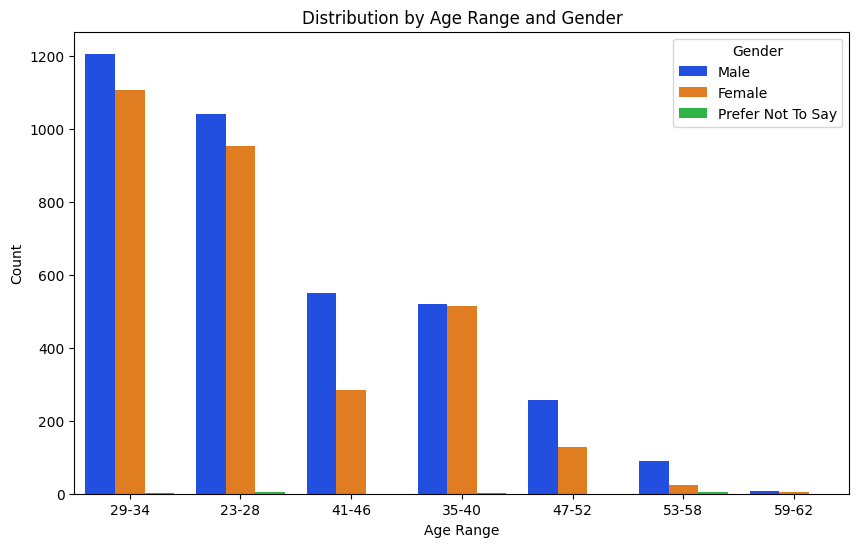

In [33]:
#Checking distribution across the different Genders
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Range', data=Salary_data, hue='Gender', palette='bright')
plt.title('Distribution by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

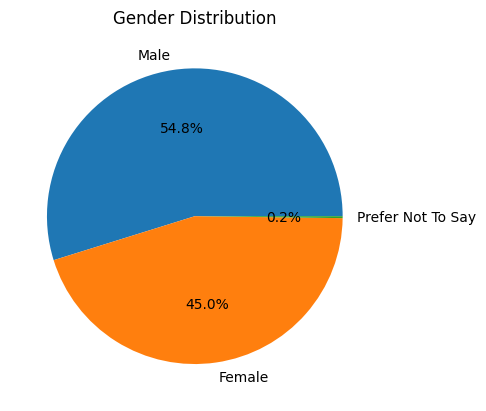

In [17]:
#Gender Distribution
gender_distribution = Salary_data['Gender'].value_counts()
# get the labels from the series index
labels = gender_distribution.index

plt.pie(gender_distribution,autopct='%1.1f%%', labels=labels)
plt.title('Gender Distribution')
plt.show()

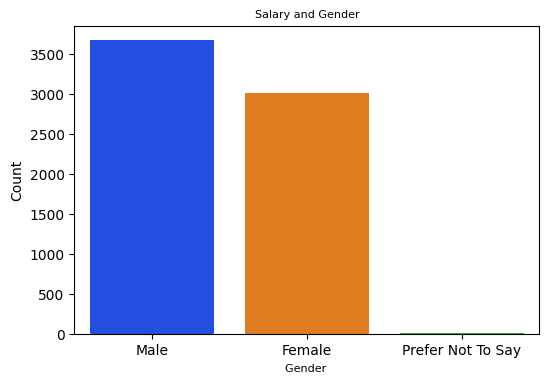

In [34]:
#Gender Distribution based on salary
plt.figure(figsize=(6, 4))
sns.countplot(Salary_data, x='Gender', palette='bright', hue='Gender')
plt.title('Salary and Gender',fontsize=8)
plt.xlabel('Gender ',fontsize=8)
plt.ylabel('Count')
plt.show()

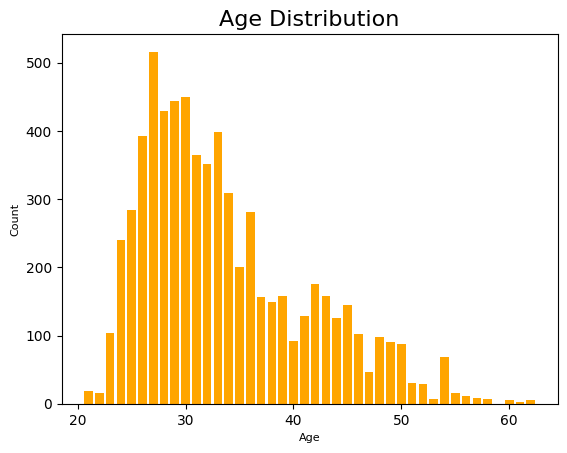

In [19]:
#Create a Bar chart showing Age Distribution
age = Salary_data['Age'].value_counts().sort_index()
plt.bar(age.index, age.values, color='Orange')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

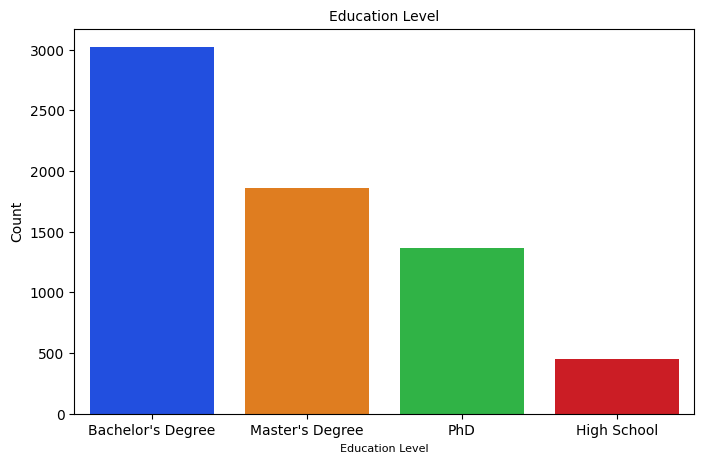

In [20]:
#Create a Bar chart showing levels of Education
plt.figure(figsize=(8, 5))
sns.countplot(Salary_data, x='Education Level', palette='bright', hue ='Education Level' )
plt.title('Education Level',fontsize=10)
plt.xlabel('Education Level',fontsize=8)
plt.ylabel('Count')
plt.show()


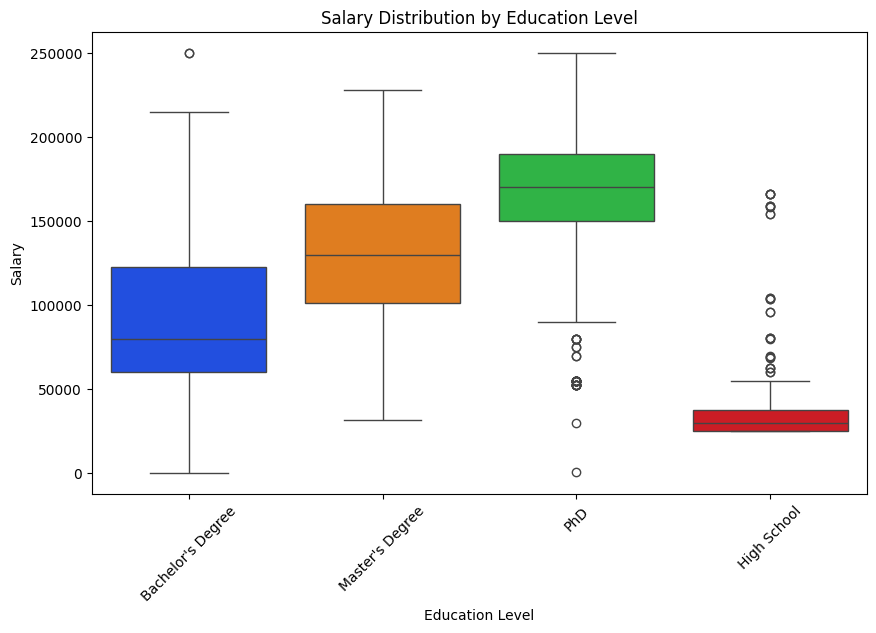

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=Salary_data, palette='bright' , hue = 'Education Level')
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

#Checking correlation of various factors

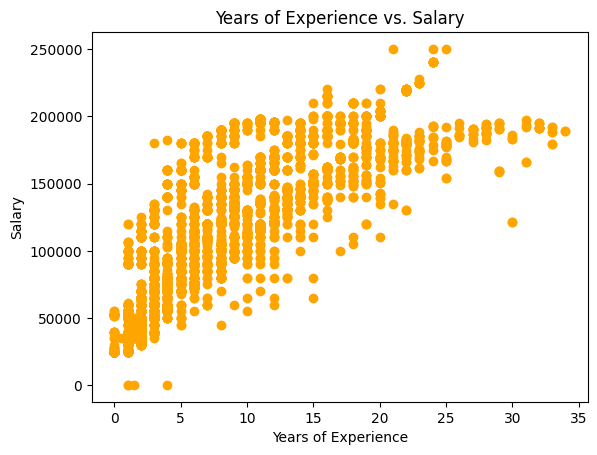

In [21]:
## checking relation between years of experience and salary
plt.scatter(Salary_data['Years of Experience'], Salary_data['Salary'] ,color = 'Orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.show()

In [22]:
#Check correlation between Salary and Years of experience
correlation = Salary_data['Years of Experience'].corr(Salary_data['Salary'])
print(f"Correlation between experience and salary: {correlation}")


Correlation between experience and salary: 0.8089681695139437


Findings from Above;
There exists a  strong positive correlation between Salary and Years of Experience.

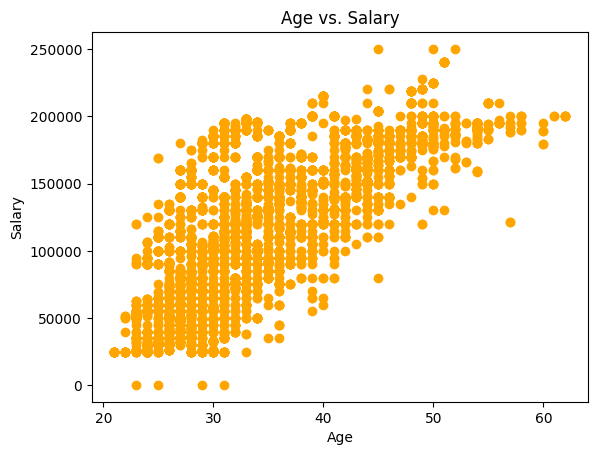

In [23]:
##Create a scatter plot to show relation between Age and salary
plt.scatter(Salary_data['Age'], Salary_data['Salary'] , color = 'Orange')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()

In [24]:
#Check correlation between Salary and Years of experience
correlation = Salary_data['Age'].corr(Salary_data['Salary'])
print(f"Correlation between Age and salary: {correlation}")

Correlation between Age and salary: 0.7280606296367428


Findings from Above;
There exists a  strong positive correlation between Salary and Age.

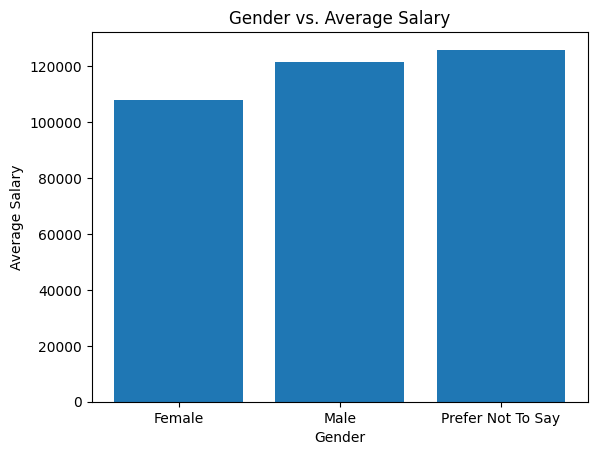

In [25]:

# Calculate the average salary for each gender
gender_salary = Salary_data.groupby('Gender')['Salary'].mean()

# Create a bar plot
plt.bar(gender_salary.index, gender_salary.values)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Gender vs. Average Salary')
plt.show()

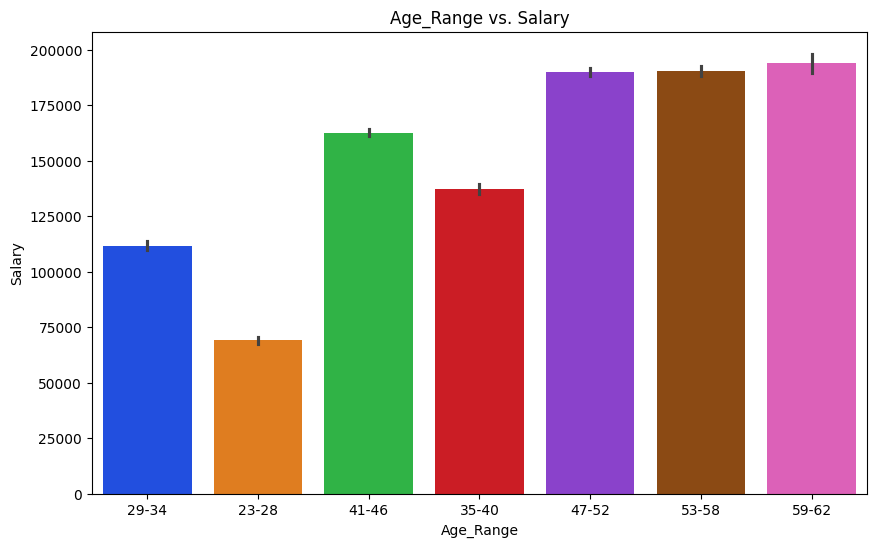

In [26]:
#Create a bar chart of Age range vs salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Range', y='Salary', data=Salary_data, hue='Age_Range', palette='bright', legend=False)
plt.title('Age_Range vs. Salary')
plt.xlabel('Age_Range')
plt.ylabel('Salary')
plt.show()

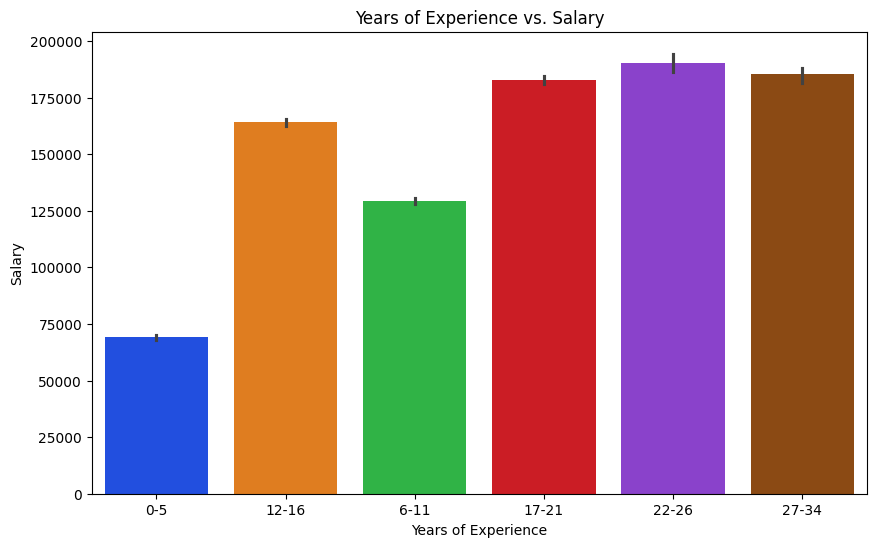

In [27]:
#Create a bar chart of Age range vs salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Range_Experience', y='Salary', data=Salary_data, hue='Range_Experience', palette='bright', legend=False)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

##Hypthesis : Employees with more years of experience and older age tend to have higher salaries.

In [28]:
from scipy.stats import ttest_ind

# Separate data into two groups based on years of experience (e.g., below and above 10 years)
group1 = Salary_data[Salary_data['Years of Experience'] <= 10]['Salary']
group2 = Salary_data[Salary_data['Years of Experience'] > 10]['Salary']

# Perform independent samples t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the results
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.3f}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in salary between the two groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in salary between the two groups.')

T-statistic: -76.97
P-value: 0.000
Reject the null hypothesis. There is a significant difference in salary between the two groups.
